# AEROSP 520 Compressible Flow: Homework 1
Jason Chen

## Problem 1
Compute the changes in specific internal energy, specific entropy, specific work and specific heat exchanged, the final pressure and temperature when air (assumed to be a perfect gas with a molecular weight of 28.9 g/mol and a specific heat ratio of 1.40) initially at a temperature of 293 K and a pressure of 101 kPa undergoes the following processes:

- (a) A reversible isochoric process with a final temperature of 1465 K.
- (b) A reversible isobaric process with a final temperature of 1465 K.
- (c) A reversible isothermal process with a final volume 1/5th of the initial volume.
- (d) An irreversible isothermal process where the entropy production Ps is 30 J/kg K and the final volume is 1/5th of the initial volume.
- (e) An isentropic process with a final volume 1/5th of the initial volume.

In each case, comment and compare your results. To better compare your results, plot using MATLAB the p−v and T−s diagrams the various solutions on the same graph (clearly indicate the initial and final states, and a line connecting them, if it does exist, and add any label to indicate your solution, for each of the processes listed above). Generate the plots in non-dimensional form, i.e. as $p/p1$ vs $v/v1$ and $T/T1$ vs $(s−s1)/R$. To help your comparison, organize the results of all cases in a final table that summarizes all quantities.

### (a) A reversible isochoric process with a final temperature of 1465 K
Reversible = no entropy generation, isochoric = volume is constant throughout the process. 

We're told in the problem statement that:

- $M$ = 28.9 g/mol
- $\gamma$ = 1.40
- $T_1$ = 293 K
- $P_1$ = 101 kPa

And the fluid is assumed to be a perfect gas. This is a reasonable assumption since real effects (IMFs) only become significant at significantly higher pressures or lower temperatures, while the conditions given here are relatively tame. This means we can use equations of state for a perfect gas, such as:

$$ p = \rho R T$$

First, we want to solve for the other initial thermodynamic state properties. In the initial state (at near room temperature), the vibrational modes of the gas are activated and therefore $c_p$ and $c_v$ will not vary significantly with temperature, i.e. we can and will assume the gas is calorically perfect. CPG relations allow us to back out:

- $R = R_u/M = (8.314 \textrm{ J/K/mol})/(0.0289 \textrm{ kg/mol}) = 287.7 \textrm{ J/kg/K}$
- $c_v = R/(\gamma-1) = 719.20 \textrm{ J/kg/K}$
- $c_p = R + c_v = 1006.9 \textrm{ J/kg/K}$

Importantly, the change in internal energy due to temperature change is easy to solve for:

$$ \Delta e = e_2 - e_1 = c_v(T_2 - T_1) = 842.9 \textrm{ kJ/kg} $$

Note that this is also assuming the CPG assumption holds for the end state. We will assume this is true for convenience (and due to the instruction of the GSI), although per [Anderson] the CPG assumption breaks down towards a TPG at around 1000 K for most gases. Using a real gas model such as REFPROP is beyond the scope of this homework but would be the preferred way to solve accurately for the change in state variables.

We can then use the first law to relate this internal energy change to heat and work:

$$ de = \delta q^{\leftarrow} - \delta w^{\rightarrow} $$
$$ \Delta e = \int_{1}^{2} \delta q^{\leftarrow} - \int_{1}^{2} p dv$$

Since the process of interest is isochoric, no expansion work can be done, so the second term is zero. This means that the energy input into the system must have come from heat input.

$$ q_{1-2}^{\leftarrow} = \Delta e $$

For entropy change, we look at the second law:

$$ ds = \frac{\delta q}{T} + ds_{irrev}$$

Since the process is reversible, $ds_{irrev} = 0$. From the first law and $ \delta q_{rev} = T ds$, we can derive a useful form of the Gibbs relation:

$$ s_2 - s_1 = c_v \ln{\frac{T_2}{T_1}} + R \ln{\frac{v_2}{v_1}} $$

The second term is once again zero since there is no volume change. Thus, $\Delta s = 1157.5 \textrm{ J/kg/K}$.

Finally, we can find the final pressure using another form of Gibbs and rearranging:

$$ s_2 - s_1 = c_p \ln{\frac{T_2}{T_1}} - R \ln{\frac{p_2}{p_1}} $$
$$ p_2 = p_1 \exp\left[{\frac{1}{R}\left(c_p \ln{\frac{T_2}{T_1}} - \Delta s\right)}\right] $$

| Problem  | $\Delta e$ (kJ/kg) | $\Delta s$ (J/kg/K) | $w_{1-2}^{\rightarrow}$ (kJ/kg) | $q_{1-2}^{\leftarrow}$ (kJ/kg) | $p_2$ (kPa) | $T_2$ (K) |
| -------- | ---------- | -------- | ---------- | -------- | -------- | -------- |
| a        | 842.9 | 1157.5 | 0 | 842.9 | 505.07 | 1465 |


### (b) A reversible isobaric process with a final temperature of 1465 K
Reversible = no entropy generation, isobaric = pressure is constant throughout the process. 

Similar to part (a), we will asssume a CPG.
- The change in internal energy is once again only a function of temperature, via $e = c_v T$
- Like before, the process is reversible so $ds_{irrev} = 0$, and we can solve for the (reversible) entropy exchange via a convenient form of Gibbs:

$$ s_2 - s_1 = c_p \ln{\frac{T_2}{T_1}} - R \ln{\frac{p_2}{p_1}} $$

The second term is zero, and we get $\Delta s = 1617.8 \textrm{ J/kg/K}$
- For work, since pressure is constant through the process, we can pull it out of the integral:

$$ w_{1-2}^{\rightarrow} = \int_{1}^{2} p dv = p \int_{1}^{2} dv = p (v_2 - v_1) $$

We can get the initial and final specific volumes using the ideal gas volumetric equation of state:

$$ pv = RT $$

And we get $ w_{1-2}^{\rightarrow} = 337.2 \textrm{ kJ/kg}$

- From the first law, we can solve easily for the heat exchanged, via $q_{1-2}^{\leftarrow} = \Delta e + w_{1-2}^{\rightarrow}$


In [12]:
import numpy as np
R = 287.7
cv = 717.5
cp = cv + R
p1 = 101e3
T1 = 293
T2 = 1465
delta_e = cv * (T2 - T1)
delta_s = cp * np.log(T2/T1) - R * np.log(p1/p1)
print(f"Internal energy change: {delta_e/1e3:.2f} kJ/kg")
print(f"Entropy change: {delta_s:.2f} J/kg/K")
v1 = R * T1 / p1
v2 = R * T2 / p1
work = p1 * (v2 - v1)
print(f"Initial specific volume: {v1:.2f} m^3/kg")
print(f"Final specific volume: {v2:.2f} m^3/kg")
print(f"Specific volume change: {v2 - v1:.4f} m^3/kg")
print(f"Work done: {work/1e3:.2f} kJ/kg")
print(f"Heat exchanged: {(delta_e + work)/1e3:.2f} kJ/kg")

Internal energy change: 840.91 kJ/kg
Entropy change: 1617.81 J/kg/K
Initial specific volume: 0.83 m^3/kg
Final specific volume: 4.17 m^3/kg
Specific volume change: 3.3385 m^3/kg
Work done: 337.18 kJ/kg
Heat exchanged: 1178.09 kJ/kg


We can intuit that this makes sense - heat transfer is positive since it is added to the system from the surroundings, positive work is done as the system increases in volume and therefore does work on its surroundings, and the amount of heat transferred is much larger than the magnitude of work done since we would expect the gas to lose energy as it expands.

| Problem  | $\Delta e$ (kJ/kg) | $\Delta s$ (J/kg/K) | $w_{1-2}^{\rightarrow}$ (kJ/kg) | $q_{1-2}^{\leftarrow}$ (kJ/kg) | $p_2$ (kPa) | $T_2$ (K) |
| -------- | ---------- | -------- | ---------- | -------- | -------- | -------- |
| b        | 840.9 | 1617.8 | 337.2 | 1178.1 | 101 | 1465 |

### (c) A reversible isothermal process with a final volume 1/5th of the initial volume
Reversible = no entropy generation, isothermal = temperature is constant throughout the process. We will assume a CPG.

- $\Delta e = 0$ since there is no temperature change
- Like before, since this process is reversible, the entropy change only comes from exchanged, reversible $ds$. We can choose a convenient form of Gibbs to solve for entropy change, where ${v_2}/{v_1} = {1}/{5}$:
$$ s_2 - s_1 = c_v \ln{\frac{T_2}{T_1}} + R \ln{\frac{v_2}{v_1}} $$
- Since the temperature is constant and the process reversible, we can find that the heat transferred into the system must be:
$$ q_{1-2}^{\leftarrow} = T\Delta s $$
- We can now solve for work, noting that the system is being compressed and we expect it to be negative:
$$w_{1-2}^{\rightarrow} = q_{1-2}^{\leftarrow} - \Delta e$$
- Finally, we can solve for the final pressure similarly to part (a):
$$ p_2 = p_1 \exp\left[{\frac{1}{R}\left(c_p \ln{\frac{T_2}{T_1}} - \Delta s\right)}\right] $$


In [3]:
import numpy as np
R = 287.7
cv = 717.5
cp = cv + R
p1 = 101e3
T1 = 293
T2 = 293
delta_s = cv * np.log(T2/T1) + R * np.log(1/5)
delta_q = T1 * delta_s
delta_e = 0
delta_w = delta_q - delta_e
print(f"Entropy change: {delta_s:.2f} J/kg/K")
print(f"Heat added: {delta_q/1e3:.2f} kJ/kg")
print(f"Work done: {delta_w/1e3:.2f} kJ/kg")
p2 = p1 * np.exp((1/R) * (-delta_s))
print(f"Final pressure: {p2/1e3:.1f} kPa")


Entropy change: -463.04 J/kg/K
Heat added: -135.67 kJ/kg
Work done: -135.67 kJ/kg
Final pressure: 505.0 kPa


| Problem  | $\Delta e$ (kJ/kg) | $\Delta s$ (J/kg/K) | $w_{1-2}^{\rightarrow}$ (kJ/kg) | $q_{1-2}^{\leftarrow}$ (kJ/kg) | $p_2$ (kPa) | $T_2$ (K) |
| -------- | ---------- | -------- | ---------- | -------- | -------- | -------- |
| c        | 0 | -463.0 | -135.67 | -135.67 | 505 | 293 |

### (d) An irreversible isothermal process where the entropy production $P_s$ is 30 J/kg/K and the final volume is 1/5th of the initial volume

This is similar to the previous problem except we have an entropy production term, such that:

$$ \Delta s = \int_{1}^{2} \frac{\delta q^{\leftarrow}}{T} + P_s $$

A lot of the justification for each step will not be repeated in detail here as it has been demonstrated before.
- $\Delta e = 0$ since there is no temperature change
- We can still use Gibbs here to relate the overall entropy change to known changes in other state variables.

$$(\Delta s)_{total} = c_v \ln{\frac{T_2}{T_1}} + R \ln{\frac{v_2}{v_1}} $$

Now we just have to note that this entropy change is the sum of both transferred and produced, and therefore the actual entropy transfer associated with heat transfer is:

$$ q_{1-2}^{\leftarrow} = T((\Delta s)_{total} - P_s) $$

Intuitively, this means that less heat needed to be transferred for the same total entropy change. Deriving the remaining properties follow the same routine and assumptions as in part (c) and are not repeated here. 

In [4]:
import numpy as np
R = 287.7
cv = 717.5
cp = cv + R
p1 = 101e3
T1 = 293
T2 = 293
delta_s = cv * np.log(T2/T1) + R * np.log(1/5)
delta_q = T1 * (delta_s - 30)
delta_e = 0
delta_w = delta_q - delta_e
print(f"Entropy change: {delta_s:.2f} J/kg/K")
print(f"Heat added: {delta_q/1e3:.2f} kJ/kg")
print(f"Work done: {delta_w/1e3:.2f} kJ/kg")
p2 = p1 * np.exp((1/R) * (-delta_s))
print(f"Final pressure: {p2/1e3:.1f} kPa")

Entropy change: -463.04 J/kg/K
Heat added: -144.46 kJ/kg
Work done: -144.46 kJ/kg
Final pressure: 505.0 kPa


This directionally makes sense since more heat had to be removed from the system to achieve the same entropy change with some generation term.

| Problem  | $\Delta e$ (kJ/kg) | $\Delta s$ (J/kg/K) | $w_{1-2}^{\rightarrow}$ (kJ/kg) | $q_{1-2}^{\leftarrow}$ (kJ/kg) | $p_2$ (kPa) | $T_2$ (K) |
| -------- | ---------- | -------- | ---------- | -------- | -------- | -------- |
| d        | 0 | -463.0 | -144.5 | -144.5 | 505 | 293 |

### (e) An isentropic process with a final volume 1/5th of the initial volume
By definition, $q_{1-2}^{\leftarrow} = \Delta s = 0$ since the process is both adiabatic and reversible.

There are pre-dervied isentropic relations, which use those two assumptions above and through the integral form of the Gibbs relations, and give:

$$ \frac{v_2}{v_1} = \left( \frac{T_2}{T_1} \right)^{-1/(\gamma-1)} $$

$$ \frac{p_2}{p_1} = \left( \frac{T_2}{T_1} \right)^{\gamma/(\gamma-1)} $$

- From the first law:

$$ \Delta e = c_v (T_2 - T_1) = -\int_{1}^{2} pdv$$

In [5]:
import numpy as np
R = 287.7
cv = 717.5
cp = cv + R
gamma = 1.4
p1 = 101e3
T1 = 293
T2 = T1 * (1/5)**(1-gamma)
p2 = p1 * (T2/T1)**(gamma/(gamma-1))
delta_e = cv * (T2 - T1)
delta_w = -delta_e
print(f"Internal energy change: {delta_e/1e3:.2f} kJ/kg")
print(f"Work done: {delta_w/1e3:.2f} kJ/kg")
print(f"Final pressure: {p2/1e3:.1f} kPa")
print(f"Final temperature: {T2:.1f} K")

Internal energy change: 189.97 kJ/kg
Work done: -189.97 kJ/kg
Final pressure: 961.3 kPa
Final temperature: 557.8 K


| Problem  | $\Delta e$ (kJ/kg) | $\Delta s$ (J/kg/K) | $w_{1-2}^{\rightarrow}$ (kJ/kg) | $q_{1-2}^{\leftarrow}$ (kJ/kg) | $p_2$ (kPa) | $T_2$ (K) |
| -------- | ---------- | -------- | ---------- | -------- | -------- | -------- |
| e        | 190.0 | 0 | -190.0 | 0 | 961.3 | 558 |

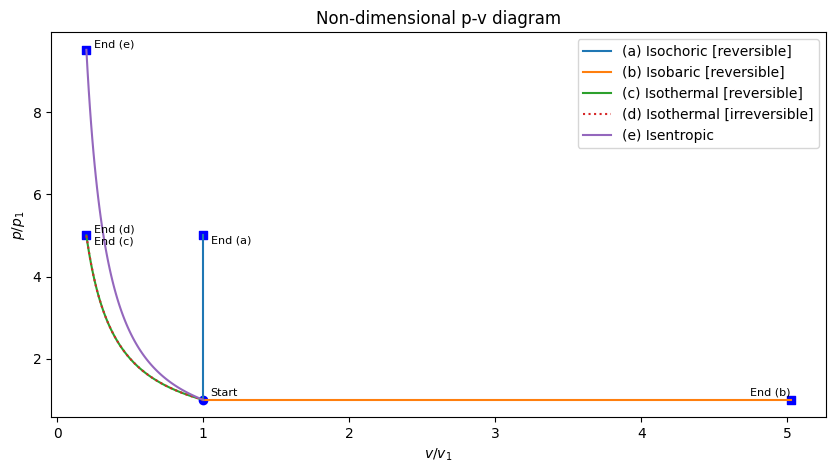

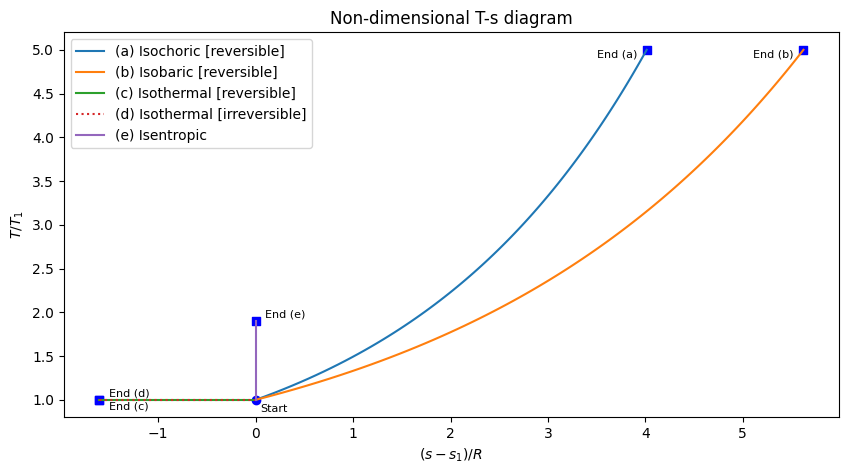

In [43]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
n = 100
R = 287.7
cv = 717.5
cp = cv + R
gamma = 1.4
p1 = 101e3
T1 = 293

# (a) Isochoric (v = const, T changes)
T2 = 1465
p2 = 505e3
T_a = np.linspace(T1, T2, n)
s_a = cv * np.log(T_a / T1)
p_a = np.linspace(p1, p2, n)
v_a = np.ones(n)
# Now, normalize
p_a_normal = p_a / p1
v_a_normal = v_a / 1
T_a_normal = T_a / T1
s_a_normal = s_a / R

# (b) Isobaric (p = const, T changes)
T2 = 1465
T_b = np.linspace(T1, T2, n)
s_b = cp * np.log(T_b / T1)
p_b = np.ones(n)
v1, v2 = 0.83, 4.17
v_b = np.linspace(v1, v2, n)
# Now, normalize
p_b_normal = p_b / 1
v_b_normal = v_b / v1
T_b_normal = T_b / T1
s_b_normal = s_b / R

# (c) Isothermal reversible (T = const, v changes)
v_c = np.linspace(v1, v1/5, n)
s_c = R * np.log(v_c / v1)
p_c = p1 * np.exp(-s_c / R)
T_c = np.ones(n)
# Now, normalize
p_c_normal = p_c / p1
v_c_normal = v_c / v1
T_c_normal = T_c / 1
s_c_normal = s_c / R

# (d) Isothermal irreversible (T = const, v changes, entropy produced)
v_d = np.linspace(v1, v1/5, n)
s_d = R * np.log(v_d / v1)
p_d = p1 * np.exp(-s_d / R)
T_d = np.ones(n)
# Now, normalize
p_d_normal = p_d / p1
v_d_normal = v_d / v1
T_d_normal = T_d / 1
s_d_normal = s_d / R

# (e) Isentropic (s = const, v changes)
v_e = np.linspace(v1, v1/5, n)
T_e = T1 * (v_e/v1) ** (1-gamma)
p_e = p1 * (T_e/T1) ** (gamma/(gamma-1))
s_e = np.zeros(n)
# Now, normalize
p_e_normal = p_e / p1
v_e_normal = v_e / v1
T_e_normal = T_e / T1
s_e_normal = s_e / R


# p-v diagram
plt.figure(figsize=(10,5))
plt.plot(v_a_normal, p_a_normal, label='(a) Isochoric [reversible]')
plt.scatter(v_a_normal[0], p_a_normal[0], color='blue', marker='o')
plt.text(v_a_normal[0] + 0.05, p_a_normal[0] + 0.05, 'Start', fontsize=8, ha='left', va='bottom')
plt.scatter(v_a_normal[-1], p_a_normal[-1], color='blue', marker='s')
plt.text(v_a_normal[-1] + 0.05, p_a_normal[-1], 'End (a)', fontsize=8, ha='left', va='top')

plt.plot(v_b_normal, p_b_normal, label='(b) Isobaric [reversible]')
plt.scatter(v_b_normal[-1], p_b_normal[-1], color='blue', marker='s')
plt.text(v_b_normal[-1], p_b_normal[-1] + 0.05, 'End (b)', fontsize=8, ha='right', va='bottom')

plt.plot(v_c_normal, p_c_normal, label='(c) Isothermal [reversible]')
plt.scatter(v_c_normal[-1], p_c_normal[-1], color='blue', marker='s')
plt.text(v_c_normal[-1] + 0.05, p_c_normal[-1] - 0.02, 'End (c)', fontsize=8, ha='left', va='top')

plt.plot(v_d_normal, p_d_normal, label='(d) Isothermal [irreversible]', linestyle=':')
plt.text(v_d_normal[-1] + 0.05, p_d_normal[-1] + 0.02, 'End (d)', fontsize=8, ha='left', va='bottom')

plt.plot(v_e_normal, p_e_normal, label='(e) Isentropic')
plt.scatter(v_e_normal[-1], p_e_normal[-1], color='blue', marker='s')
plt.text(v_e_normal[-1] + 0.05, p_e_normal[-1] + 0.02, 'End (e)', fontsize=8, ha='left', va='bottom')

plt.xlabel('$v/v_1$')
plt.ylabel('$p/p_1$')
plt.title('Non-dimensional p-v diagram')
plt.legend()
plt.show()

# T-s diagram
plt.figure(figsize=(10,5))
plt.plot(s_a_normal, T_a_normal, label='(a) Isochoric [reversible]')
plt.scatter(s_a_normal[0], T_a_normal[0], color='blue', marker='o')
plt.text(s_a_normal[0] + 0.05, T_a_normal[0] - 0.05, 'Start', fontsize=8, ha='left', va='top')
plt.scatter(s_a_normal[-1], T_a_normal[-1], color='blue', marker='s')
plt.text(s_a_normal[-1] - 0.1, T_a_normal[-1], 'End (a)', fontsize=8, ha='right', va='top')

plt.plot(s_b_normal, T_b_normal, label='(b) Isobaric [reversible]')
plt.scatter(s_b_normal[-1], T_b_normal[-1], color='blue', marker='s')
plt.text(s_b_normal[-1] - 0.1, T_b_normal[-1], 'End (b)', fontsize=8, ha='right', va='top')

plt.plot(s_c_normal, T_c_normal, label='(c) Isothermal [reversible]')
plt.scatter(s_c_normal[-1], T_c_normal[-1], color='blue', marker='s')
plt.text(s_c_normal[-1] + 0.1, T_c_normal[-1] - 0.02, 'End (c)', fontsize=8, ha='left', va='top')

plt.plot(s_d_normal, T_d_normal, label='(d) Isothermal [irreversible]', linestyle=':')
plt.scatter(s_d_normal[-1], T_d_normal[-1], color='blue', marker='s')
plt.text(s_d_normal[-1] + 0.1, T_d_normal[-1] + 0.02, 'End (d)', fontsize=8, ha='left', va='bottom')

plt.plot(s_e_normal, T_e_normal, label='(e) Isentropic')
plt.scatter(s_e_normal[-1], T_e_normal[-1], color='blue', marker='s')
plt.text(s_e_normal[-1] + 0.1, T_e_normal[-1] + 0.02, 'End (e)', fontsize=8, ha='left', va='bottom')


plt.xlabel('$(s-s_1)/R$')
plt.ylabel('$T/T_1$')
plt.title('Non-dimensional T-s diagram')
plt.legend()
plt.show()

The above p-v and T-s diagrams can be checked for intuition. For example, the isentropic process is vertical and the isothermal processes are horizontal on the T-s diagram respectively. You can also notice that the two isothermal processes, one reversible and the other irreversible, are exactly coincident. This is because due to the formulation of the problem, the total entropy change does not change, but rather the fraction that is reversible or irreversible.

### Summary Table

| Problem  | $\Delta e$ (kJ/kg) | $\Delta s$ (J/kg/K) | $w_{1-2}^{\rightarrow}$ (kJ/kg) | $q_{1-2}^{\leftarrow}$ (kJ/kg) | $p_2$ (kPa) | $T_2$ (K) |
| -------- | ---------- | -------- | ---------- | -------- | -------- | -------- |
| a        | 842.9 | 1157.5 | 0 | 842.9 | 505.07 | 1465 |
| b        | 840.9 | 1617.8 | 337.2 | 1178.1 | 101 | 1465 |
| c        | 0 | -463.0 | -135.67 | -135.67 | 505 | 293 |
| d        | 0 | -463.0 | -144.5 | -144.5 | 505 | 293 |
| e        | 190.0 | 0 | -190.0 | 0 | 961.3 | 558 |


## Problem 2

Consider the frictionless piston of mass $m$ in a cylinder filled with a calorically perfect gas at an initial pressure, temperature and volume $p_1$, $T_1$, and $V_1$ resting in equilibrium. From the initial (equilibrium) state 1, a final (equilibrium) state 3 is reached through the following two processes:

1. Process 1 → 2: Heat is slowly removed from the cylinder until the piston rests at half its initial height (state 2)
2. Process 2 → 3: The piston is then rapidly lifted up until the final volume isequal to the initial, and then it is locked in place. Assume that the piston is lifted up sufficiently quickly that the process can be assumed adiabatic.

### (a) Sketch the process on a T-S diagram. Make sure the curve is to scale with the proper functional dependencies, the initial and final states are labelled, and any other relevant detail is specified.

As recommended by the note, we'll first list out the system itself, and its knowns and unknowns.

Generally speaking, we are analyzing a control mass (CM) system whose control surface is the inner surface of the piston, such that it encapsulates the trapped gas but none of the piston walls.

Knowns:
- CM system: energy and entropy cannot be transported in by mass flow
- Initial thermodynamic state
- Heat is _slowly_ removed from the cylinder, psiton is frictionless -> this implies that from state 1 to 2, there is no entropy generation (it is reversible) and there is adequate time to reach an "intermediate" equilibrium in the system when heat is removed
- CPG assumption
- State 2 is at half the initial volume of state 1

Unknowns:
- Processes: for example, we don't know the exact process of heat removal, meaning we can't strictly integrate $\delta q^{\leftarrow} = T ds$
- $de$ does not necessarily equal zero, since although the pressure may stabilize, the temperature at state 2 may or may not be the same as in state 1

Approach:
- We know that the piston reaches equilibrium when the force balance between $mg$ and $pA$ match (let $A$ be the constant area of the piston, $V = Ah$ where $h$ is the height). This means that since the end state is also in equilibrium, $p_2 = p_1$
- Since the pressure is constant (again, this is only true assuming the heat is removed slowly enough to allow intermediate force balances), the work done by the piston is:

$$ w^{\rightarrow} = \int_{1}^{2} p dv = p(v_2 - v_1) = p(\frac{1}{2}v_1 - v_1) = -\frac{1}{2}p v_1 $$

- Next, we can use the first law in differential form:

$$ de = \delta q^{\leftarrow} - \delta w^{\rightarrow} $$

Using $de = c_v dT$ for an ideal gas and the second law, we get $ T ds = c_v dT + p dv $. From the ideal gas volumetric EOS $v = RT/p$ and deriving $dv = R/p (dT)$ (recall that $p$ is quasi-static here):

$$ T ds = c_v dT + p \frac{R}{p} dT = dT (c_v + R) = c_p dT $$

$$ ds = c_p \left( \frac{1}{T} dT \right) $$

Finally, integrating this will give our T-s curve:

$$ s(T) = c_p \left[ \ln{T} \right]_{T_1}^{T} = c_p \ln{\frac{T}{T_1}} + C$$

Plugging in the initial condition that $s(T_1) = s_1$, we get:

$$ s(T) = c_p \ln{\frac{T}{T_1}} + s_1$$
$$ T(s) = T_1 \exp{\left( \frac{s-s_1}{c_p} \right)} $$


Solving for $s(T_2)$:
$$ s_2 = s_1 + c_p \ln{\frac{T_2}{T_1}} = s_1 + c_p \ln{1/2} = s_1 - c_p \ln{2} $$

Thus, we have our endpoints and our function for the T-s curve from state 1 to state 2:

![T-s diagram](hw_1_img1.jpg "T-s diagram")

Note that the path from state 2 to state 3 is unknown as there is not enough information. We know that entropy was produced and therefore the point for state 3 must lie to the right of state 2, and that since the problem states that the process is adiabatic and the fluid can only do positive work on the environment, the internal energy (and therefore temperature for a CPG) must decrease, or at the limit case stay the same for a completely free expansion where no work was extracted from the gas. How far to the right the point for state 3 lies also depends on the rapid expansion, i.e. how much entropy was produced in the process.

### (b) How much heat $(Q_{1−2})$ was removed from the gas in process 1 → 2?

Using the second law, which assumes the heat was removed reversibly (which from the description of the problem, it is):

$$ q_{1-2} = \int_{1}^{2} T ds = \int_{1}^{2} T c_p \left( \frac{1}{T} dT \right) = c_p (T_2 - T_1) $$

In extensive form, where $n$ is the mass of the system:

$$ Q_{1-2} = -\frac{1}{2}n c_p T_1 $$

Note that we are specifying this value of heat as negative, since positive heat transfer would be heat addition into the system (the CM of gas).

### (c) How much work $(W_{1−2})$ was done by the system in process 1 → 2?

This was derived in (a), but the extensive solution is:

$$ W_{1-2} = -n\frac{1}{2}p v_1 $$

Note that we are defining the system as the CM of gas, where work done by the system on its surroundings is positive. Hence, this value is negative, since the surroundings did work on the system.

### (d) What is the entropy change between state 1 and 2 ? How much of this was produced?

The entropy change was $-c_p \ln{2}$, as shown above. None of this was produced due to the assumption of slow heat removal and a frictionless piston, meaning there are no irreversibilities.

### (e) Is the final state 3 the same as the initial state 1?

No, and in multiple avenues. Firstly, the free expansion between state 2 and state 3 is irreversible, i.e. we lost the ability to do work, and so even if we introduced the same amount of heat removed back into the system, the initial and final states would not be equal. However the problem also states that the free expansion is adiabatic, meaning we would only expect the state 3 temperature to further decrease, instead of increasing back to $T_1$. Another way to look at this is that since entropy will be generated by the free expansion, we will not be able to recover the enthalpy of the fluid without a greater amount of $Q$ than was initially removed from the fluid.

### (f) If the process 2 → 3 resulted in an entropy production (per unit mass) of 500 J/kg/K, what is the net change in total internal energy of the gas inside the cylinder from 1 to 3?

Starting with the second law (recall that we're assuming adiabatic):
$$ \Delta s = \int \frac{\delta q^{\leftarrow}}{T} + P_s = P_s$$

Since we know the state 2 temperature, and the state 2 and 3 volume, we can use Gibbs:

$$ \Delta s = c_v \ln{\frac{T_3}{T_2}} + R \ln{\frac{v_3}{v_2}} =  c_v \ln{\frac{T_3}{T_2}} + R \ln{2}$$
$$ T_3 = T_2 \exp{\left[\frac{1}{c_v} (P_s - R \ln{2})\right]}$$

We can then find the total change in internal energy from state 1 to state 3 using the CPG relation:

$$ \Delta e = c_v (T_3 - T_1) = c_v \left(T_2 \exp{\left[\frac{1}{c_v} (P_s - R \ln{2})\right]} - T_1 \right) = c_v T_1 \left(\frac{1}{2} \exp{\left[\frac{P_s - R \ln{2}}{c_v} \right]} - 1 \right)$$

Using the initial conditions for air in problem 1, we get a net change in internal energy of around $-50.7 \textrm{ kJ/kg}$.